In [4]:
#Load required libraries
import pandas as pd
import seaborn as sns

import os

#Get current working directory (.\\notebooks) -----HR
cwd = os.getcwd()

#Get parent folder to access (.\\Data) -----HR
parent = os.path.dirname(cwd)

import joblib
## load the X_train, y_train, X_test, y_test datasets-----AP
X_train = joblib.load(os.path.join(parent, 'Data', 'X_train.pkl'))
X_test = joblib.load(os.path.join(parent, 'Data', 'X_test.pkl'))
y_train = joblib.load(os.path.join(parent, 'Data', 'y_train.pkl'))
y_test = joblib.load(os.path.join(parent, 'Data', 'y_test.pkl'))

In [ ]:
import joblib
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load pre-tuned models
xgb_pre_tuned = joblib.load(os.path.join(parent, 'models', 'xgboost_pre_tuned.pkl'))
rf_pre_tuned = joblib.load(os.path.join(parent, 'models', 'random_forest_pre_tuned.pkl'))
log_reg_pre_tuned = joblib.load(os.path.join(parent, 'models', 'logistic_regression_pre_tuned.pkl'))
nn_model_pre_tuned = joblib.load(os.path.join(parent, 'models', 'neural_network_pre_tuned.pkl'))




Classification Report for XGBoost Pre-Tuned:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        95
           1       0.74      0.68      0.71        94

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.73      0.72      0.72       189

ROC AUC Score for XGBoost Pre-Tuned: 0.7990481522956328


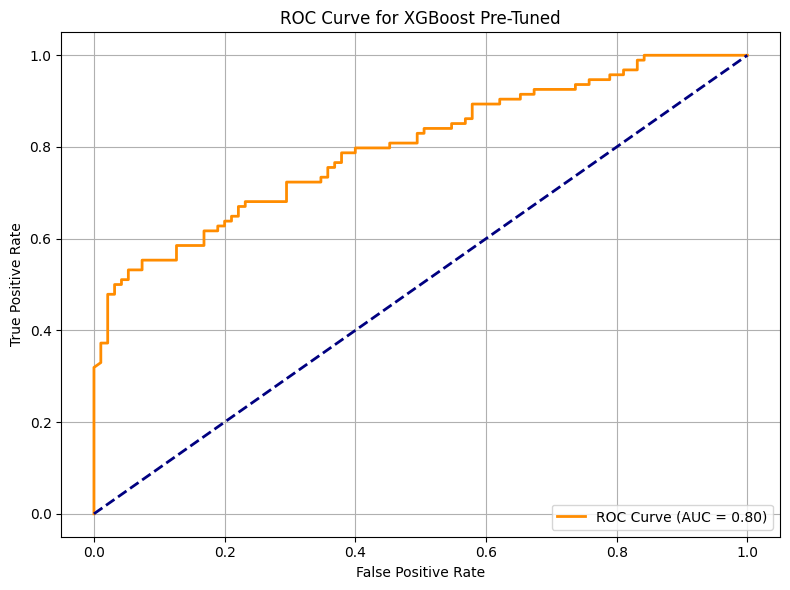

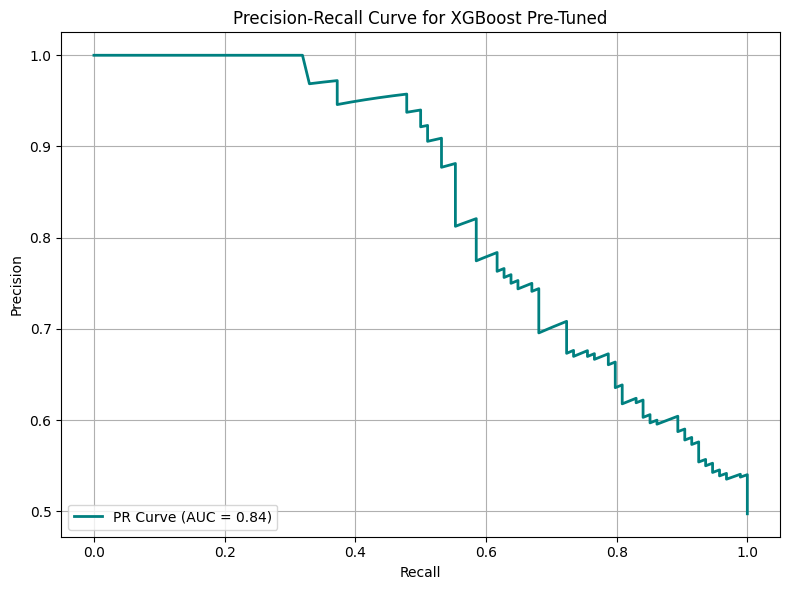


Classification Report for Random Forest Pre-Tuned:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        95
           1       0.78      0.67      0.72        94

    accuracy                           0.74       189
   macro avg       0.75      0.74      0.74       189
weighted avg       0.75      0.74      0.74       189

ROC AUC Score for Random Forest Pre-Tuned: 0.8248600223964165


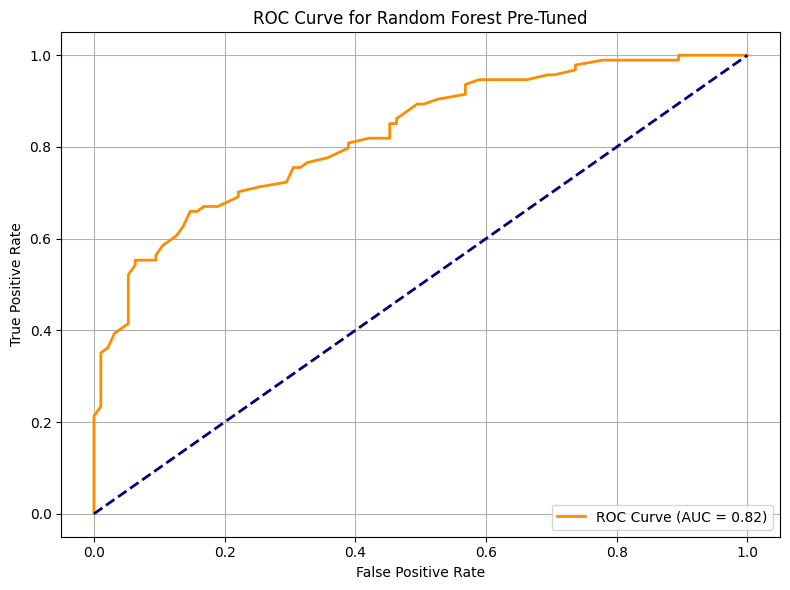

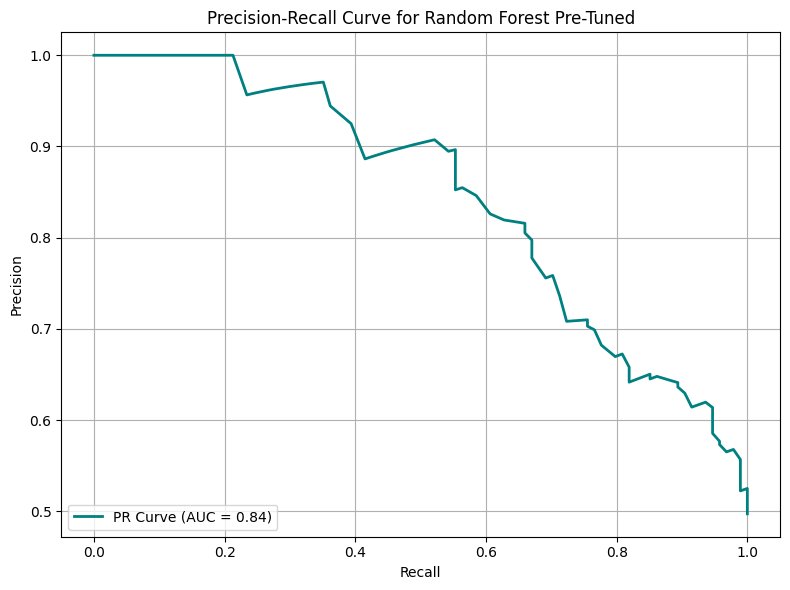


Classification Report for Logistic Regression Pre-Tuned:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53        95
           1       0.54      0.60      0.57        94

    accuracy                           0.55       189
   macro avg       0.55      0.55      0.55       189
weighted avg       0.55      0.55      0.55       189

ROC AUC Score for Logistic Regression Pre-Tuned: 0.5806270996640538


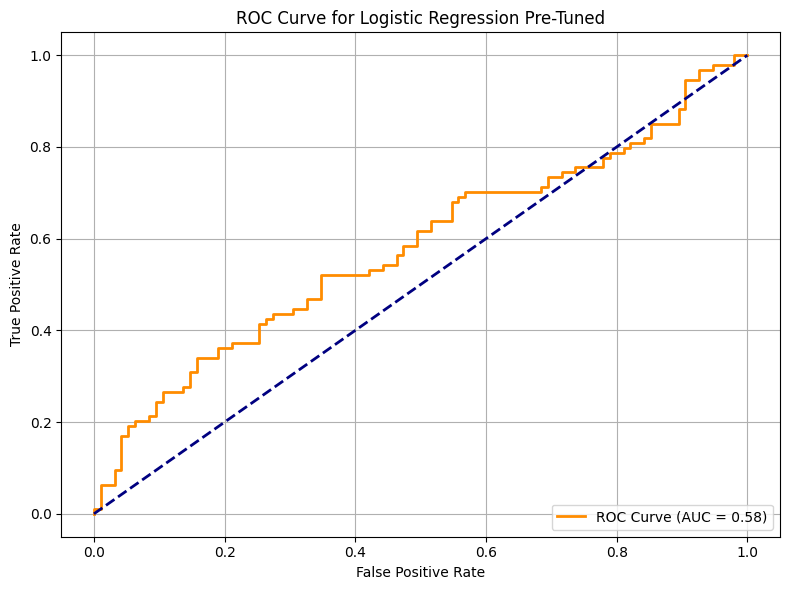

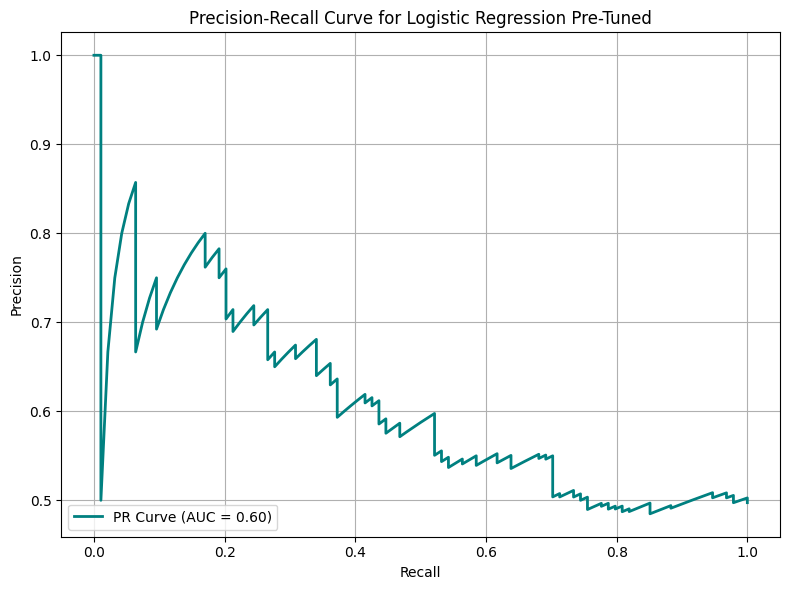


Classification Report for Neural Network Pre-Tuned:
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        95
           1       0.54      0.43      0.48        94

    accuracy                           0.53       189
   macro avg       0.54      0.53      0.53       189
weighted avg       0.54      0.53      0.53       189

ROC AUC Score for Neural Network Pre-Tuned: 0.5745800671892497


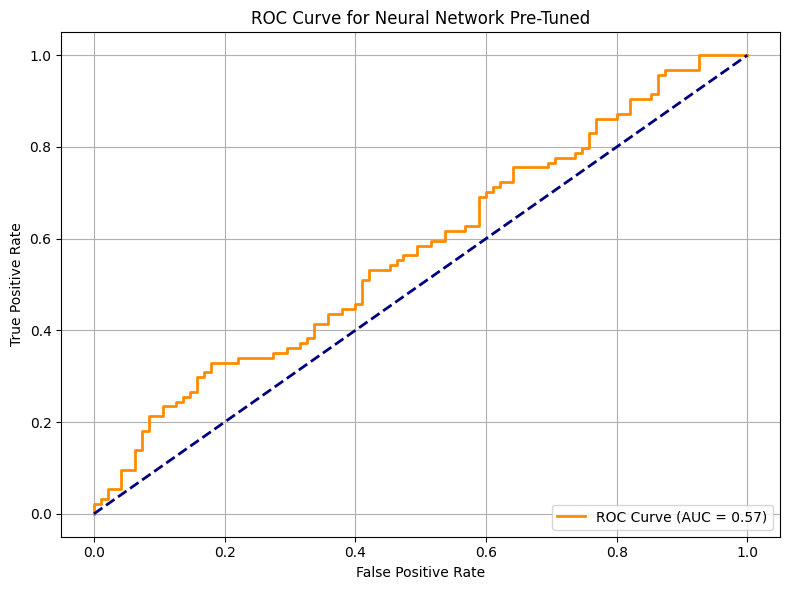

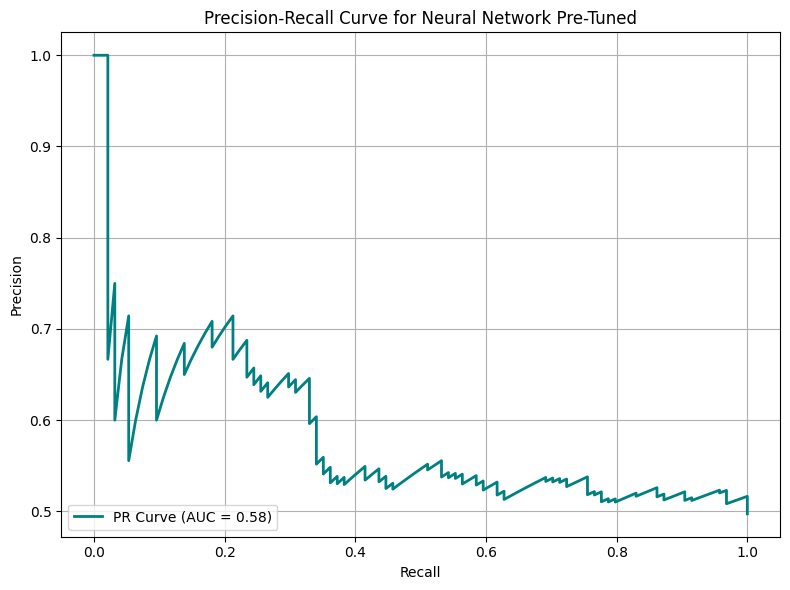

In [ ]:

# Function to plot ROC Curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_test, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="teal", lw=2, label=f"PR Curve (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_proba)}")
    # Plot ROC Curve
    plot_roc_curve(y_test, y_proba, model_name)
    # Plot Precision-Recall Curve
    plot_precision_recall_curve(y_test, y_proba, model_name)

# Evaluate pre-tuned models
evaluate_model(xgb_pre_tuned, X_test, y_test, "XGBoost Pre-Tuned")
evaluate_model(rf_pre_tuned, X_test, y_test, "Random Forest Pre-Tuned")
evaluate_model(log_reg_pre_tuned, X_test, y_test, "Logistic Regression Pre-Tuned")
evaluate_model(nn_model_pre_tuned, X_test, y_test, "Neural Network Pre-Tuned")